# Extracting Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\KAUSHIK\OneDrive\Desktop\datasets\Fish.csv")

# Data Analysis

In [3]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
data.isnull()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
data.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

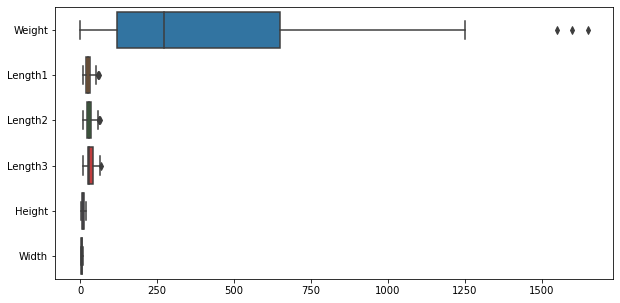

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,orient='h')

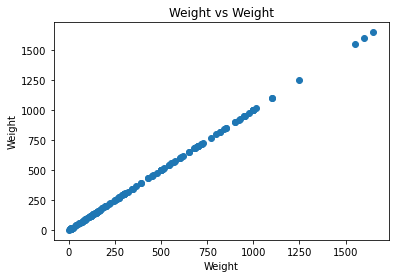

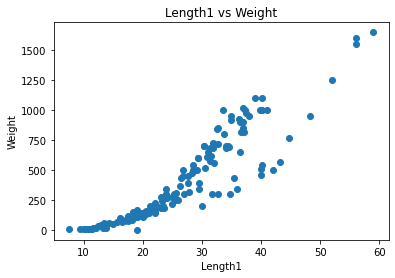

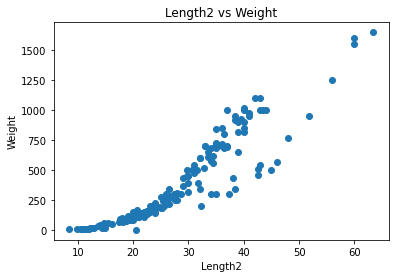

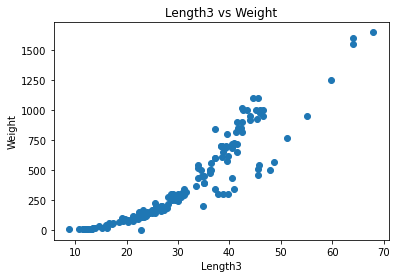

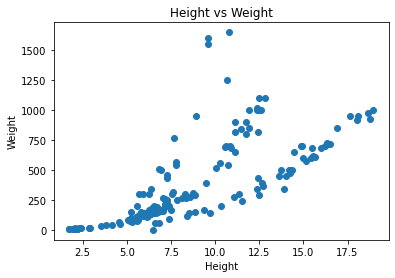

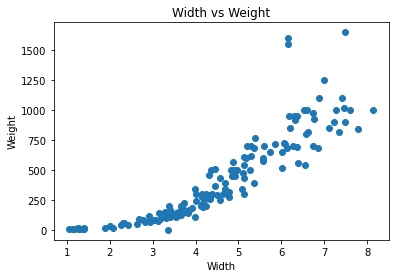

In [11]:
for i in data.columns:
    if data[i].dtype != "O":
        plt.scatter(data[i],data['Weight'])
        plt.xlabel(i)
        plt.ylabel('Weight')
        plt.title(f"{i} vs Weight")
        plt.show()

<AxesSubplot:>

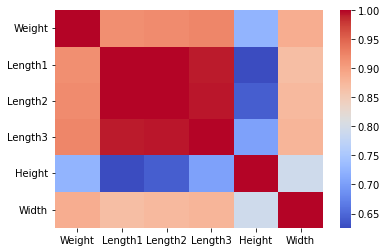

In [12]:
sns.heatmap(data.corr(),cmap='coolwarm')

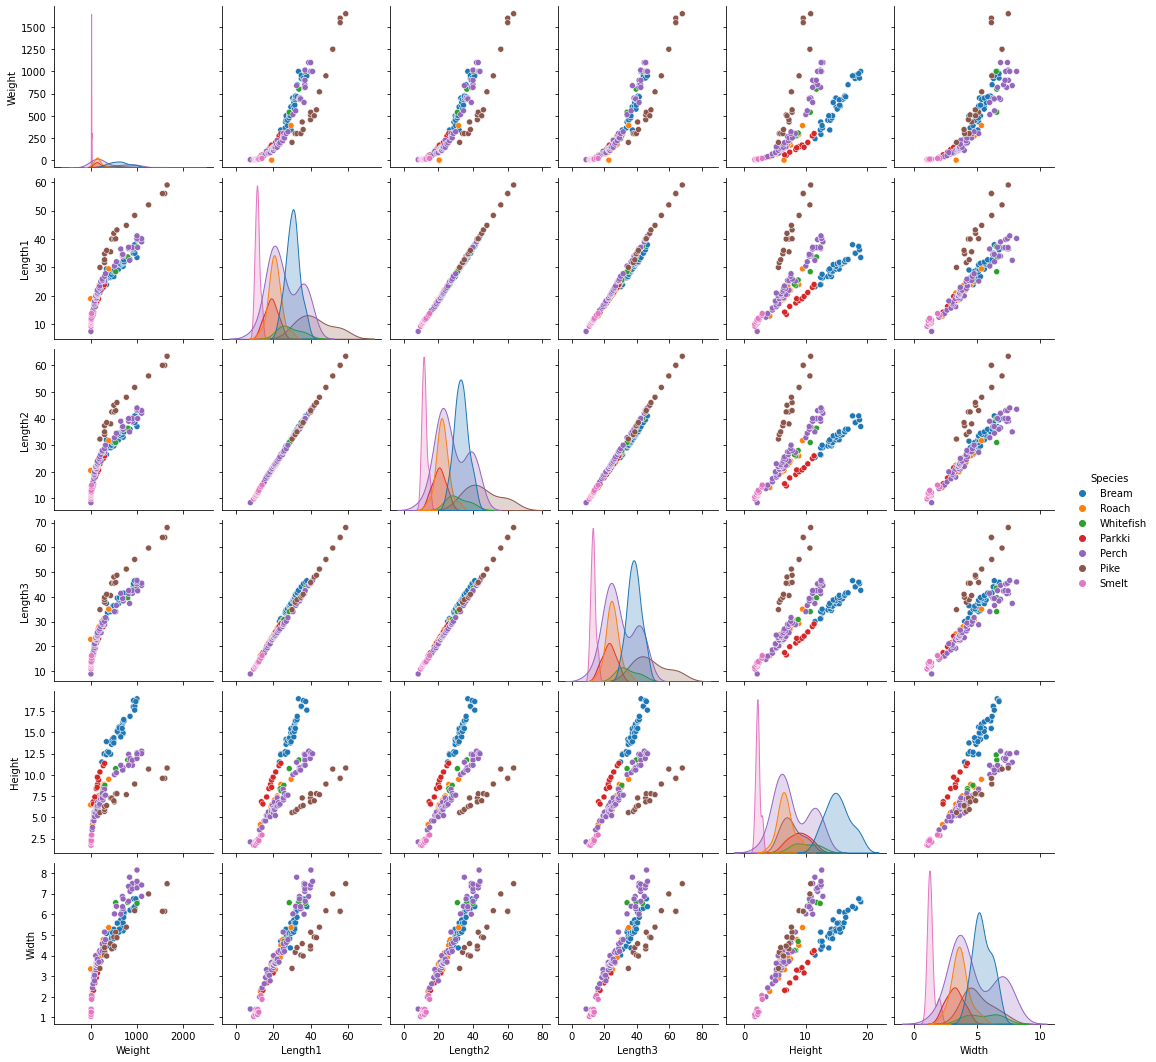

In [13]:
sns.pairplot(data,hue='Species')

# ALGORITHMS PREPARERATION

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [24]:
y=data['Species']
x=data.drop('Species',axis=1)

In [16]:
x

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [17]:
y

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

# Building a Logistic Regression model

In [19]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predlr=lr.predict(X_test)
print(predlr)

['Perch' 'Bream' 'Perch' 'Pike' 'Perch' 'Perch' 'Roach' 'Perch' 'Perch'
 'Roach' 'Smelt' 'Bream' 'Pike' 'Pike' 'Perch' 'Bream' 'Perch' 'Perch'
 'Bream' 'Perch' 'Bream' 'Perch' 'Perch' 'Roach' 'Bream' 'Perch' 'Bream'
 'Perch' 'Smelt' 'Smelt' 'Perch' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Pike' 'Perch' 'Roach' 'Smelt' 'Perch'
 'Smelt' 'Pike' 'Perch']


In [21]:
print(confusion_matrix(Y_test,predlr))

[[11  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0]
 [ 0  0 16  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  2  0  3  0  0]
 [ 0  0  1  0  0  6  0]
 [ 0  0  2  0  0  0  0]]


In [22]:
print(classification_report(Y_test,predlr))

              precision    recall  f1-score   support

       Bream       0.92      1.00      0.96        11
      Parkki       0.00      0.00      0.00         2
       Perch       0.76      1.00      0.86        16
        Pike       1.00      1.00      1.00         5
       Roach       0.75      0.60      0.67         5
       Smelt       1.00      0.86      0.92         7
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.85        48
   macro avg       0.63      0.64      0.63        48
weighted avg       0.79      0.85      0.82        48



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Building a Decision Tree Model

In [30]:
X = data.iloc[:,1:].copy()
y = data.iloc[:,0].copy()
le = LabelEncoder()
ylab= le.fit_transform(y)
labels = pd.DataFrame({"y":y,"ylabel":ylab})
labels.drop_duplicates(inplace=True)
labels = labels.sort_values(by="ylabel")
labels

,y,ylabel
0,Bream,0
61,Parkki,1
72,Perch,2
128,Pike,3
35,Roach,4
145,Smelt,5
55,Whitefish,6


In [31]:
dt = DecisionTreeClassifier(random_state=11)
dtg = GridSearchCV(estimator=dt,
                       param_grid={"max_leaf_nodes":list(np.arange(2,50,1)),
                                  "criterion":["gini","entropy"]}
                                  ,scoring="f1_weighted",cv=5,n_jobs=-1)
m = dtg.fit(X_train,Y_train)
print("Best Model: "+str(m.best_estimator_))
print("Decision Tree CV F1 Score: "+str(m.best_score_))
print("Decision Tree Test F1 Score: "+str(m.score(X_test,Y_test)))

C:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  y = column_or_1d(y)


Best Model: DecisionTreeClassifier(max_leaf_nodes=24, random_state=11)
Decision Tree CV F1 Score: 0.6883552810825538
Decision Tree Test F1 Score: 0.695979020979021


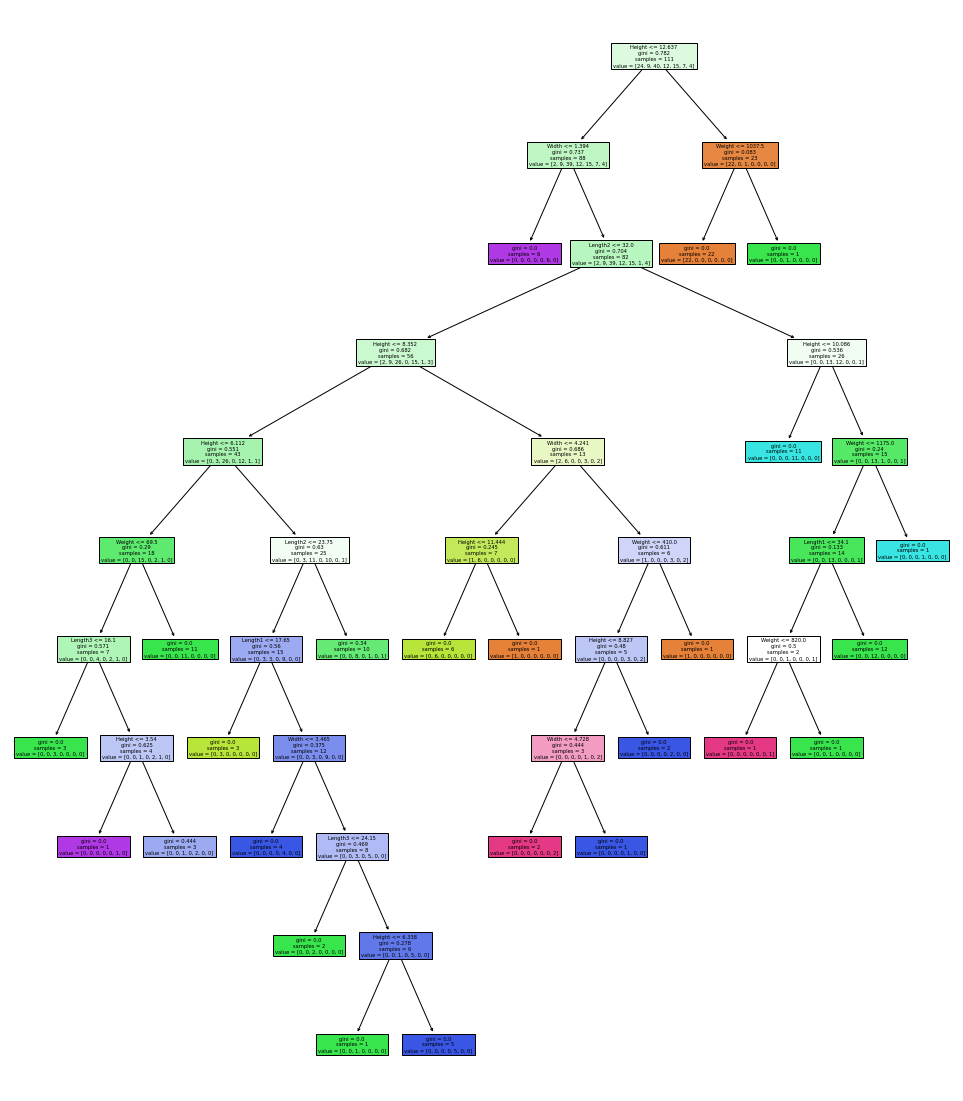

In [32]:
fdt = m.best_estimator_
fdt.fit(X_train,Y_train)
plt.figure(figsize=(17,20))
plot_tree(fdt,filled=True,feature_names=list(X.columns))
plt.show()

In [57]:
pred = fdt.predict(X_test)

In [61]:
print(accuracy_score(Y_test,pred))

0.7083333333333334


In [63]:
print(confusion_matrix(Y_test,pred))

[[ 9  0  0  0  2  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0 12  1  0  0  3]
 [ 0  0  0  5  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  1  0  0  6  0]
 [ 1  0  1  0  0  0  0]]


In [64]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

       Bream       0.90      0.82      0.86        11
      Parkki       1.00      1.00      1.00         2
       Perch       0.63      0.75      0.69        16
        Pike       0.83      1.00      0.91         5
       Roach       0.00      0.00      0.00         5
       Smelt       1.00      0.86      0.92         7
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.71        48
   macro avg       0.62      0.63      0.63        48
weighted avg       0.69      0.71      0.70        48

